In [8]:
import util
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

In [2]:
filename = "../data/train_cleaned_1.csv"

data = util.load(filename)

x_train, y_train = data[0]
x_valid, y_valid = data[1]
x_test, y_test = data[2]

x_train_valid = np.concatenate((x_train, x_valid), axis=0)
y_train_valid = np.concatenate((y_train, y_valid), axis=0)

Accuracy Training: 0.9929701230228472
validation: 0.7887323943661971


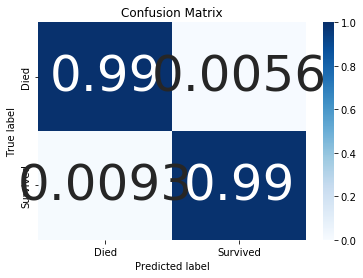

In [7]:
model1 = RandomForestClassifier(max_depth=50, min_samples_split=2)
model1.fit(x_train, y_train)
y_pred = model1.predict(x_train)

train_score = model1.score(x_train, y_train)
val_score = model1.score(x_valid, y_valid)

print(f"Accuracy Training: {train_score}")
print(f"validation: {val_score}")

cm = confusion_matrix(y_train, y_pred)
util.plot_confusion_matrix(cm)

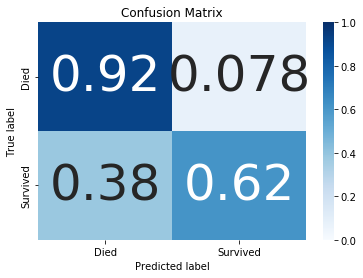

In [6]:
y_pred_val = model1.predict(x_valid)

cm1 = confusion_matrix(y_valid, y_pred_val)
cm_norm = cm1 / cm1.sum(axis=1).reshape(-1, 1)
util.plot_confusion_matrix(cm_norm)

# Some tuning of hyperparameters

Above we noticed that the model is performing really well on the training data; however failing badly on the validation data. It shows that the model is overfitting to our training data

Therefore, we would like to tune hyperparameters a bit to add more bias in our model in order for it to perform better on the test data.

For this we will make use of RandomizedSearchCV from sklearn

In [9]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [10]:
rc = RandomForestClassifier()
rc_random = RandomizedSearchCV(estimator = rc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rc_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [11]:
rc_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': False}

Accuracy Training: 0.9138840070298769
validation: 0.8028169014084507


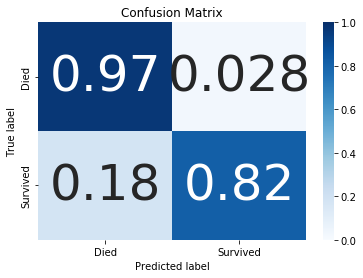

In [12]:
best_random = rc_random.best_estimator_
best_random.fit(x_train, y_train)
y_pred = best_random.predict(x_train)

train_score = best_random.score(x_train, y_train)
val_score = best_random.score(x_valid, y_valid)

print(f"Accuracy Training: {train_score}")
print(f"validation: {val_score}")

cm = confusion_matrix(y_train, y_pred)
util.plot_confusion_matrix(cm)

The above results are really good and we can even consider doing some further tuning of hyperparameters to see if we can get the accuracy even higher

Accuracy Training: 0.9521800281293952
Accuracy Testing: 0.8028169014084507


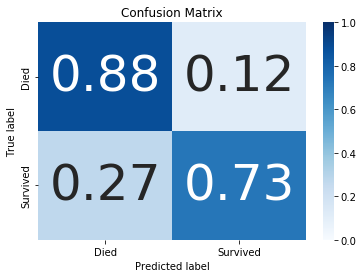

In [14]:
finalModel = RandomForestClassifier(n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features='sqrt', max_depth=30, bootstrap=False)

finalModel.fit(x_train_valid, y_train_valid)
y_pred = model1.predict(x_test)

train_score = model1.score(x_train_valid, y_train_valid)
test_score = model1.score(x_test, y_test)

print(f"Accuracy Training: {train_score}")
print(f"Accuracy Testing: {val_score}")

cm = confusion_matrix(y_test, y_pred)
util.plot_confusion_matrix(cm)